In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import scipy.stats as stats
%matplotlib inline

In [50]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [51]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [52]:
# Delete all the whitespace from column names
for col in df.columns:
    df.rename(columns={col: col.strip()}, inplace=True)

In [53]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Variables that look unreasonable

1. Measles - This variable is measured in cases per 1000 people. However, 15% of the measle column has values over 1000. How are these values possible? I am going to delete the entire column.<br>
<br>
2. Population - There are many countries that have unrealistically low population counts. For example, this data claims the population of the Maldives in 2003 is 34, and the population of China in 2002 is 1284. I believe there are missing zeros. I will add the missing zeroes if it seems appropriate.

In [54]:
# Dropping Measles column.
df.drop(columns=['Measles'], inplace=True)

# Adding zeros to China and Maldives where appropiate

china_min_population = 1.2*10**9
for index in df[df['Country'] == 'China'].index:
    while df.iloc[index]['Population'] < china_min_population:
        df.loc[index:index, 'Population'] = df.loc[index:index, 'Population']*10

maldives_min_population = 2*10**5
for index in df[df['Country'] == 'Maldives'].index:
    while df.iloc[index]['Population'] < maldives_min_population:
        df.loc[index:index, 'Population'] = df.loc[index:index, 'Population']*10

## Dealing with missing values

In [55]:
# Percentage of missing values in every column.
df.isnull().sum()/df.isnull().count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
BMI                                0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
HIV/AIDS                           0.000000
GDP                                0.152485
Population                         0.221920
thinness  1-19 years               0.011572
thinness 5-9 years                 0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

In [56]:
countries = df['Country'].unique()

# I filled in the missing values using interpolation.
# I chose interpolation because of the time series

for country in countries:
    df.loc[df['Country'] == country, df.columns] = df.loc[df['Country'] == country, df.columns].interpolate()

# After interpolation, I dropped the rest of the missing values    
df.dropna(inplace=True)

# Percentage of missing values in every column should now = 0.
df.isnull().sum()/df.isnull().count()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
BMI                                0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
HIV/AIDS                           0.0
GDP                                0.0
Population                         0.0
thinness  1-19 years               0.0
thinness 5-9 years                 0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

## Dealing with outliers

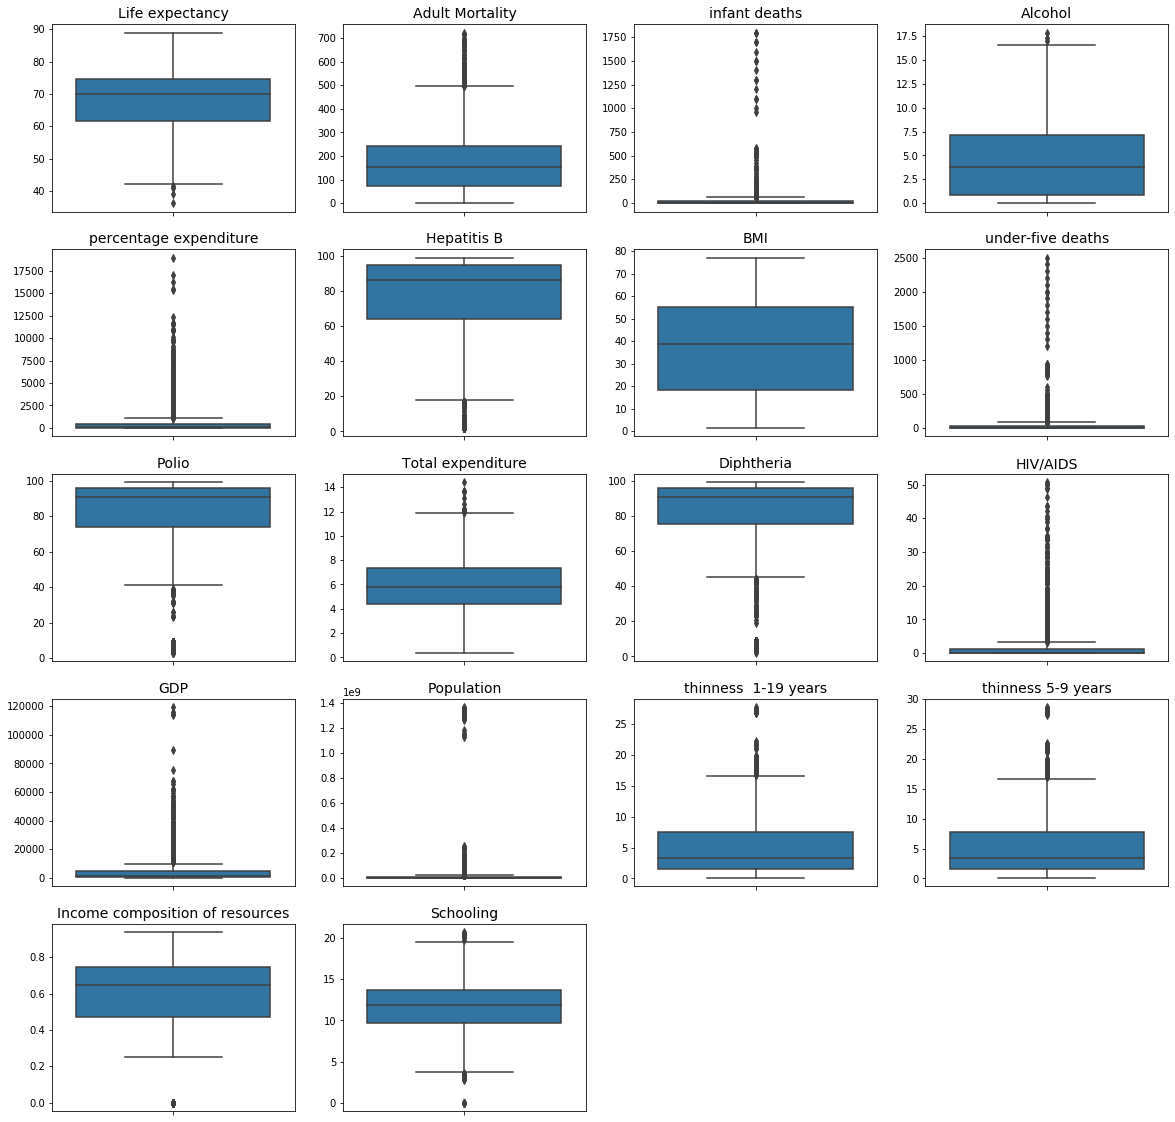

In [57]:
plt.figure(figsize=(20,20))

# Check for outliers in all columns.

i = 1
for col in df.columns[3:]:
    plt.subplot(5, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=14)
    plt.ylabel('')
    i += 1
plt.show()

An outlier is considered 1.5 times greater than the IQR. There is a significant amout of outliers in most fields. This can significantly impact our mean and standard deviation for these fields. I will use winsorization and log transformations to eliminate these outliers. I will winsorize the smallest amount for each field until all outliers are eliminated. I chose winsorization and log transformations for 3 reasons.<br>
<br>
1. Each field has a unique number of outliers<br>
<br>
2. The location of the outliers is different for each field. Some fields have top outliers, some fields have bottom outliers, and some fields have both.<br>
<br>
3. Log transformations make the distributions more normal while taking care of outliers when used appropriately.

In [58]:
from scipy.stats.mstats import winsorize

# I created a function to eliminate all outliers with minimum winsorization.
def winsorize_col(col):
    q75, q25 = np.percentile(df[col], 75), np.percentile(df[col], 25)
    iqr = q75 - q25
    lower_limit = q25 - 1.5*iqr
    upper_limit = q75 + 1.5*iqr
    low_increment = .01
    high_increment = .01
    df['winsorized_'+ col] = df[col]
    while df['winsorized_'+ col].min() < lower_limit or df['winsorized_'+ col].max() > upper_limit:
        if df[col].min() > lower_limit:
            low_increment = 0
        if df[col].max() < upper_limit:
            high_increment = 0
        df['winsorized_'+ col] = winsorize(df[col], (low_increment, high_increment))
        q75, q25 = np.percentile(df['winsorized_'+ col], 75), np.percentile(df['winsorized_'+ col], 25)
        iqr = q75 - q25
        lower_limit = q25 - 1.5*iqr
        upper_limit = q75 + 1.5*iqr
        low_increment += .01
        high_increment += .01

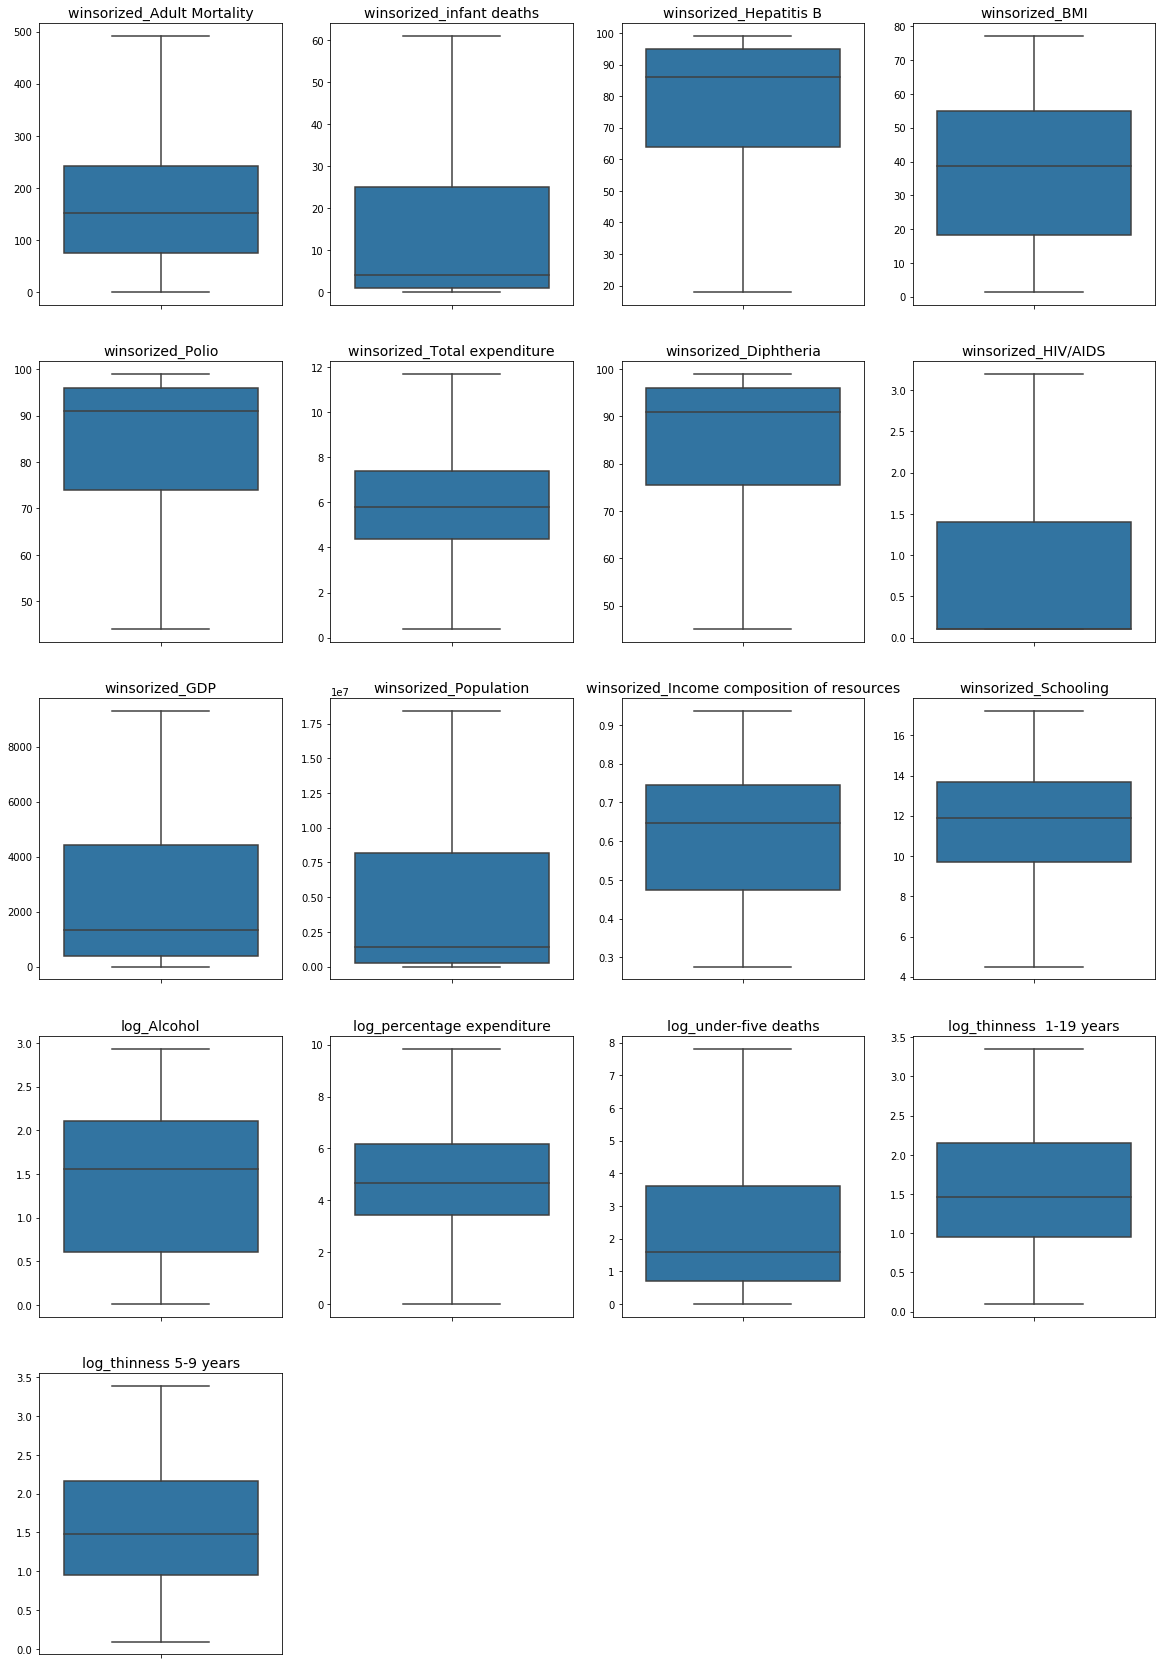

In [59]:
# columns I will winsorize
winsorize_cols = ['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Income composition of resources', 'Schooling']

# columns I will use log transformation
log_tranform_cols = ['Alcohol', 'percentage expenditure', 'under-five deaths',
                       'thinness  1-19 years', 'thinness 5-9 years']

for col in winsorize_cols:
    winsorize_col(col)

for col in log_tranform_cols:
    df['log_' + col] = np.log(df[col]+1)

i = 1
plt.figure(figsize=(20,30))

for col in df.columns[22:]:
    plt.subplot(5,4,i)
    sns.boxplot(y=df[col])
    plt.ylabel('')
    plt.title(col, fontsize=14)
    i+=1

plt.show()

# All of the winsorized and log transformed boxplots should not contain any outliers.

## Univariate visualization of all variables

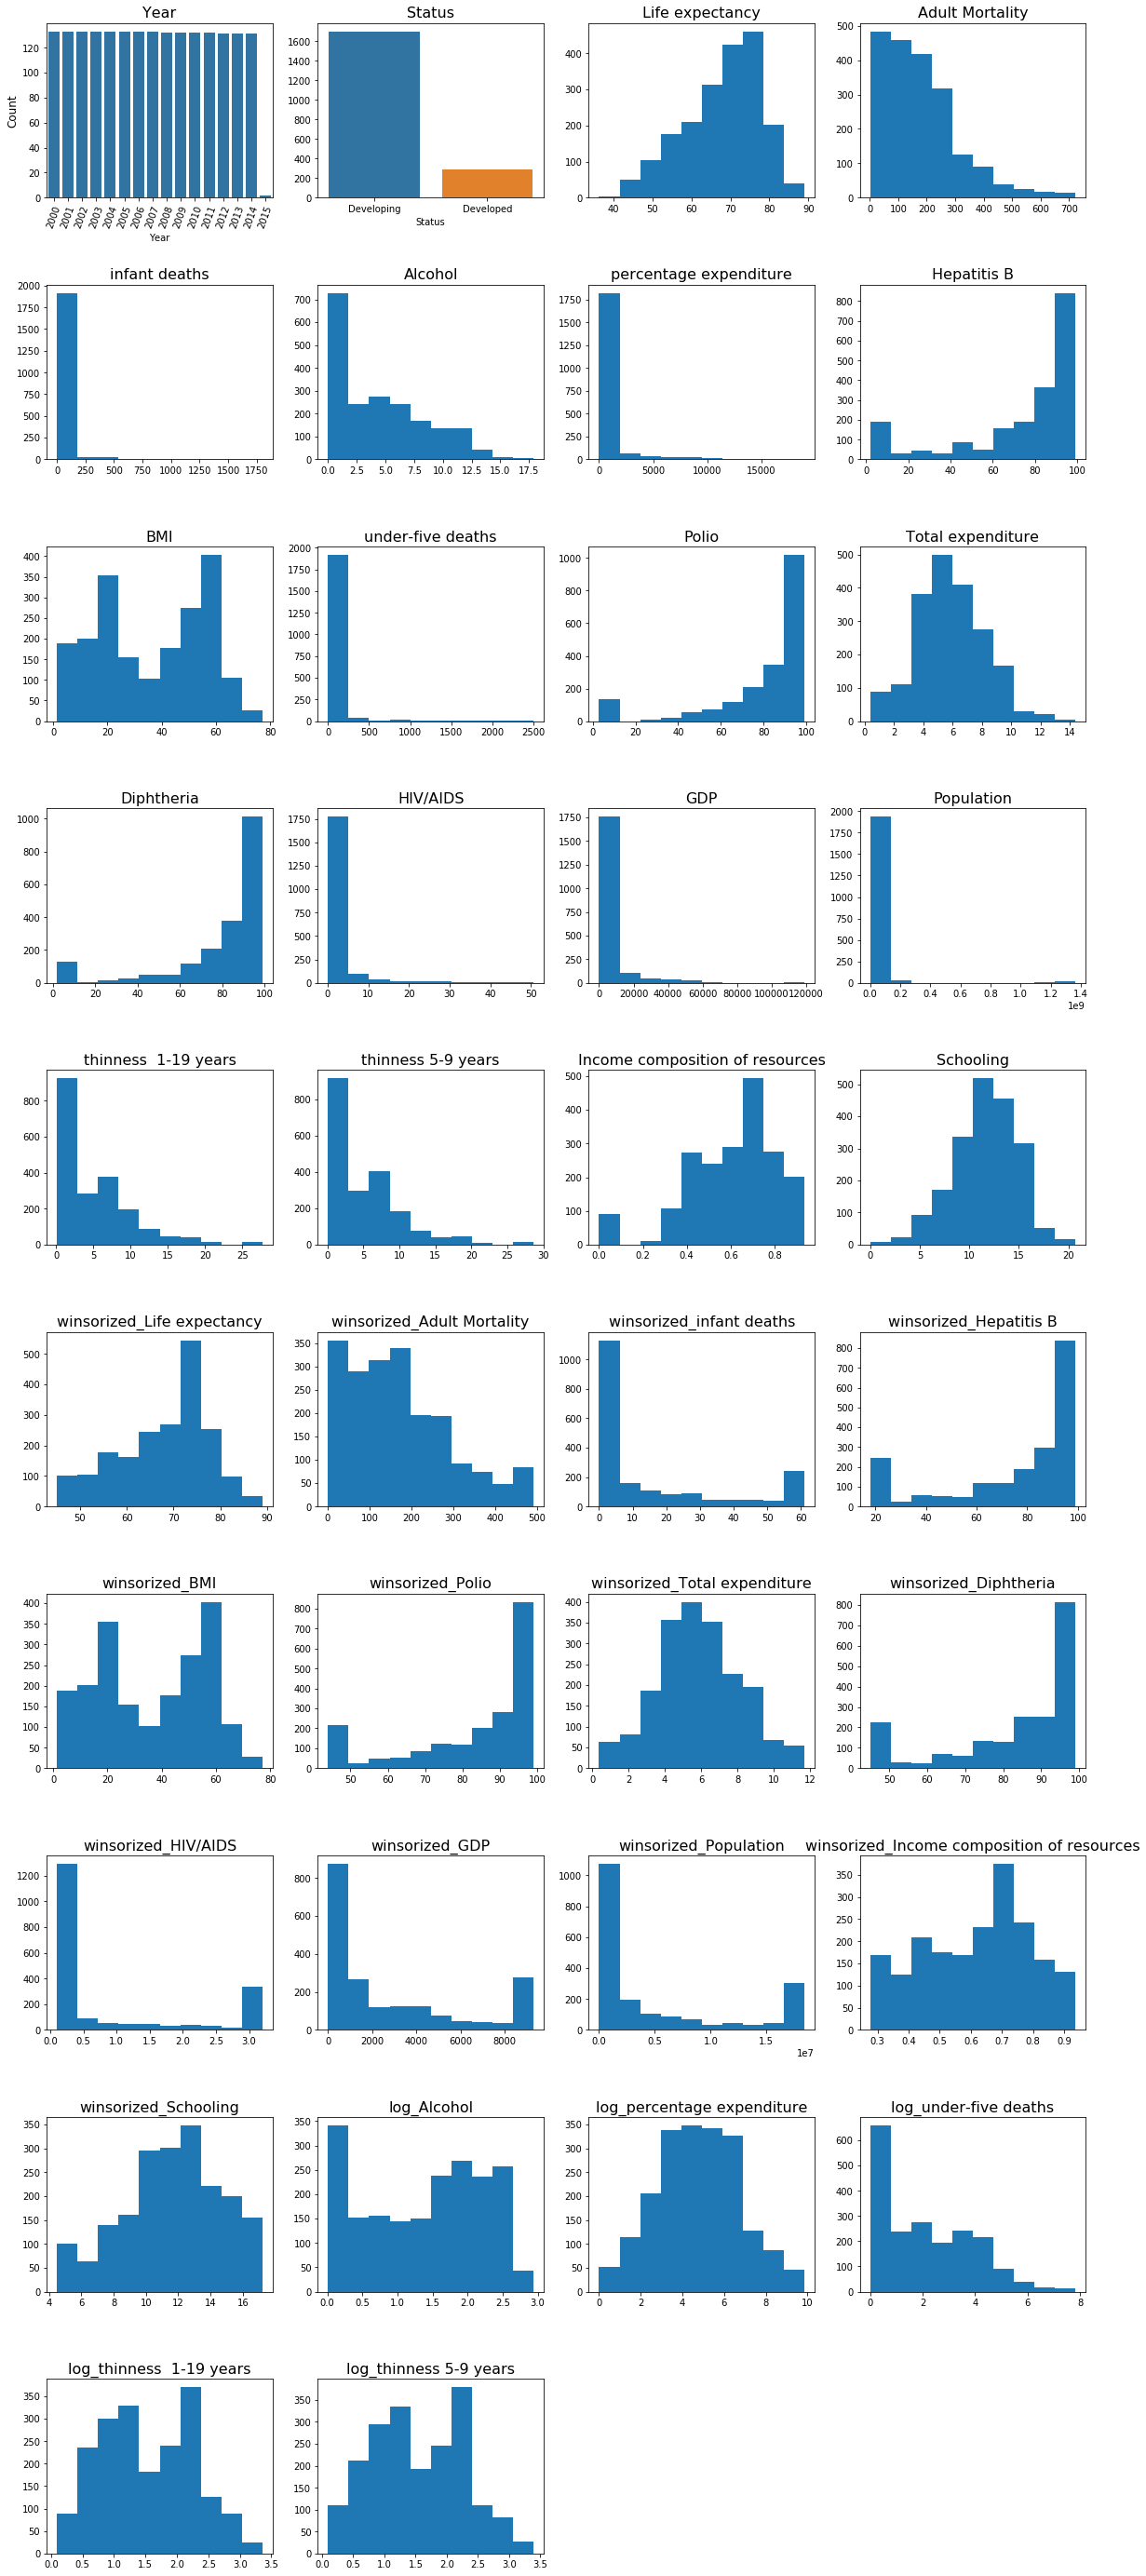

In [60]:
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace=.5)

plt.subplot(10,4,1)
sns.countplot(df['Year'], color='C0')
plt.xticks(rotation=70)
plt.ylabel('Count', fontsize=12)
plt.title('Year', fontsize=16)

plt.subplot(10,4,2)
sns.countplot(df['Status'])
plt.xticks(rotation=0)
plt.ylabel('')
plt.title('Status', fontsize=16)

i=3
for col in df.columns[3:]:
    plt.subplot(10,4,i)
    plt.hist(df[col])
    plt.title(col, fontsize=16)
    i += 1

plt.show()

## Multivariate visualization of all variables with target variable (Life expectancy)

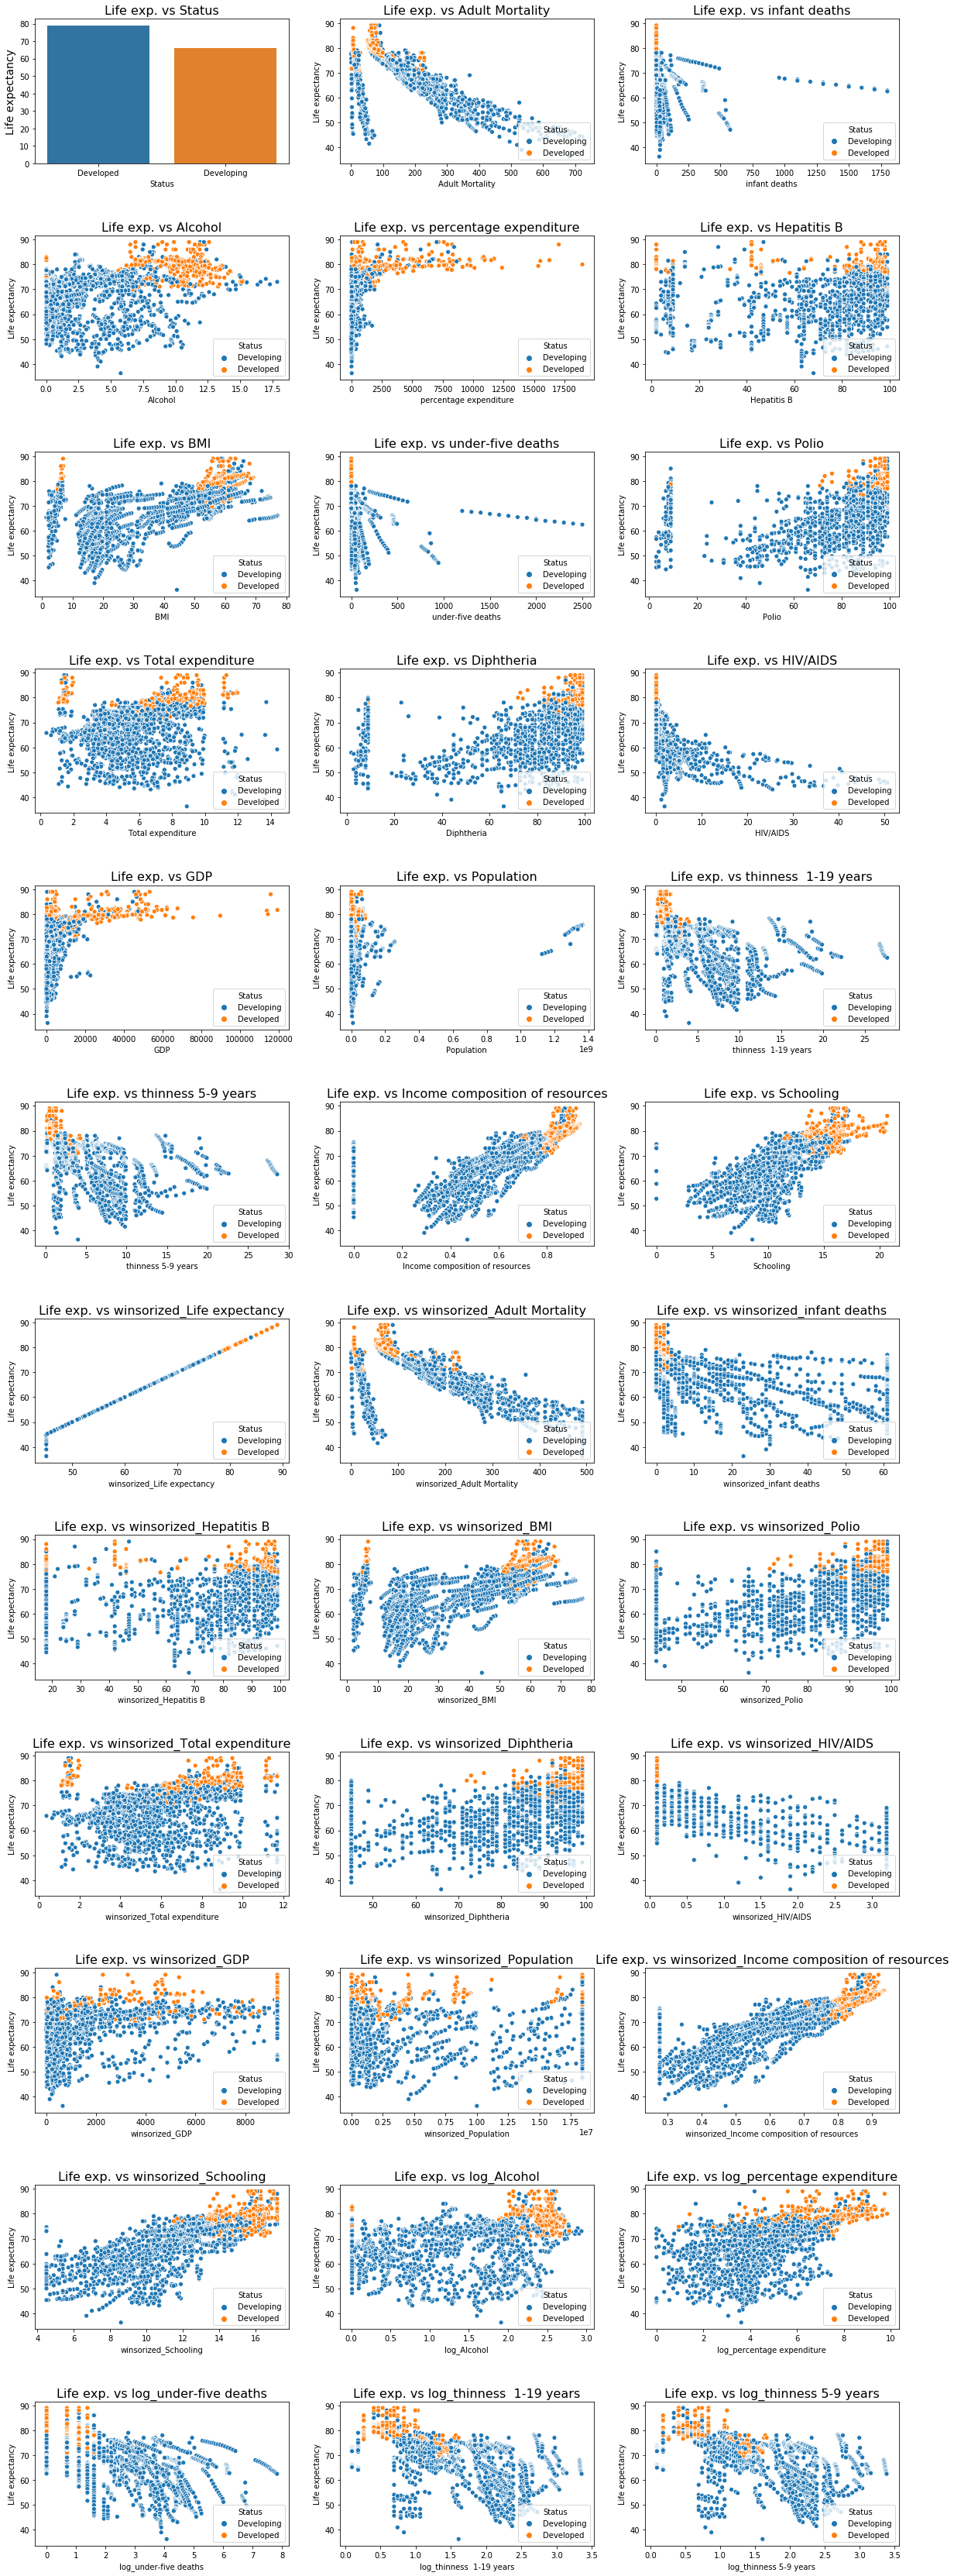

In [61]:
plt.figure(figsize=(20,60))
plt.subplots_adjust(hspace=.5)

plt.subplot(12,3,1)
sns.barplot(x=df.groupby('Status').mean().index, y=df.groupby('Status').mean()['Life expectancy'])
plt.title('Life exp. vs Status', fontsize=16)
plt.ylabel('Life expectancy', fontsize=14)

i = 2
for col in df.columns[4:]:
    plt.subplot(12,3,i)
    sns.scatterplot(x=df[col], y=df['Life expectancy'], hue=df['Status'])
    plt.title('Life exp. vs {}'.format(col), fontsize=16)
    plt.legend(loc='lower right')
    i+=1
plt.show()

## correlation between all continuous variables and life expectancy

In [62]:
correlation = df.corr()['Life expectancy']
correlation.sort_values()

winsorized_HIV/AIDS                          -0.791719
Adult Mortality                              -0.660529
winsorized_Adult Mortality                   -0.654773
log_under-five deaths                        -0.579032
HIV/AIDS                                     -0.576373
log_thinness  1-19 years                     -0.559347
log_thinness 5-9 years                       -0.557978
winsorized_infant deaths                     -0.515276
thinness  1-19 years                         -0.458724
thinness 5-9 years                           -0.450095
under-five deaths                            -0.187438
infant deaths                                -0.160922
winsorized_Population                        -0.023101
Population                                    0.043319
Year                                          0.171485
Total expenditure                             0.199288
winsorized_Total expenditure                  0.204255
Hepatitis B                                   0.249625
winsorized

#### Features with a correlation coefficient greater than .65 or less than -.65
1. winsorized_Income composition of resources
2. winsorized_Schooling
3. winsorized_HIV/AIDS
4. winsorized_BMI
5. Adult mortality

#### These features show a strong correlation with our target. However, before we add these features to our model, let's see if they are correlated with each other.

In [63]:
possible_features = ['winsorized_Income composition of resources', 'winsorized_Schooling', 'winsorized_HIV/AIDS',
                     'winsorized_BMI', 'Adult Mortality']
df[possible_features].corr()

,winsorized_Income composition of resources,winsorized_Schooling,winsorized_HIV/AIDS,winsorized_BMI,Adult Mortality
winsorized_Income composition of resources,1.000000,0.887103,-0.582536,0.611216,-0.477125
winsorized_Schooling,0.887103,1.000000,-0.534670,0.602608,-0.411172
winsorized_HIV/AIDS,-0.582536,-0.534670,1.000000,-0.469267,0.573606
winsorized_BMI,0.611216,0.602608,-0.469267,1.000000,-0.372519
Adult Mortality,-0.477125,-0.411172,0.573606,-0.372519,1.000000


- There is a strong correlation between 'winsorized_Income composition of resources' and 'winsorized_Schooling'. I will drop 'winsorized_schooling' from our model features, since 'winsorized_Income composition of resources' is more correlated with our target variable.
- I will also add the categorical variable 'status' to our model, because it shows a strong correlation with our target
#### All of the visuals below show the strong correlation of our model features with our target

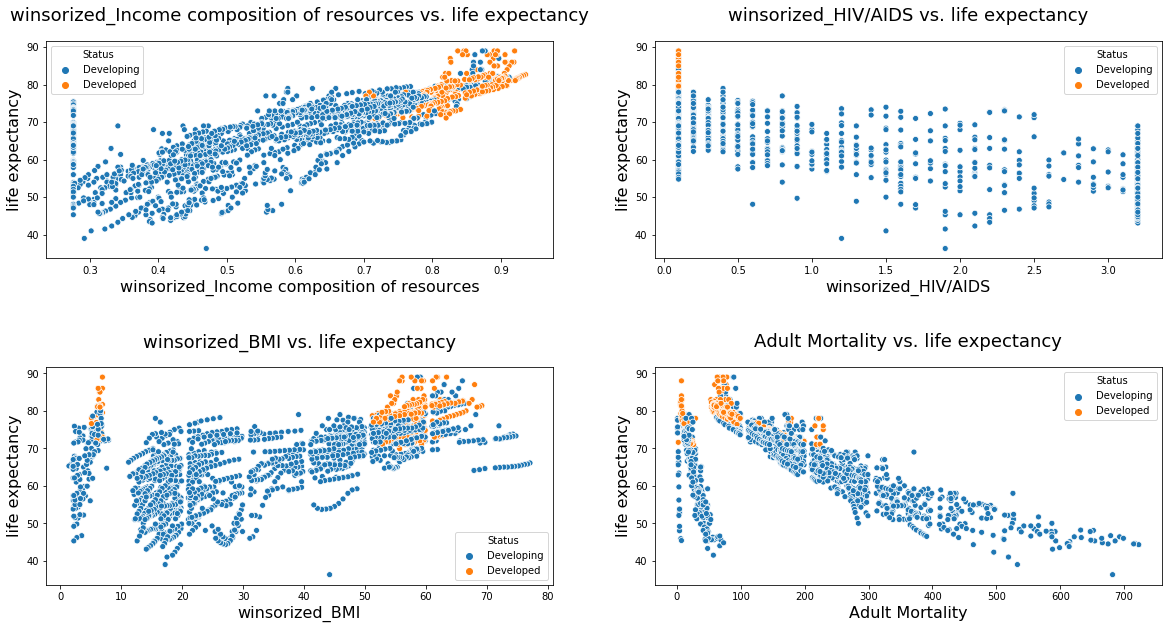

In [64]:
continuous_model_features = df[['winsorized_Income composition of resources', 'winsorized_HIV/AIDS', 'winsorized_BMI', 
                          'Adult Mortality']]

categorical_features = df['Status']

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=.5)

i = 1
for col in continuous_model_features:
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['Life expectancy'], hue=categorical_features)
    plt.title('{} vs. life expectancy'.format(col), fontsize=18, pad=20)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('life expectancy', fontsize=16)
    i+=1
plt.show()

# Summary
- Income composition has a strong positive correlation with life expectancy.
- HIV/AIDS has a moderate negative correlation with life expefctancy.
- Adult Mortaility as a strong negative correlation with life expectancy.
- BMI has a moderate postive correlation with life expectancy.
- Developed countries have a much higher life expectancy than developing countries.